# 1. Reference libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

Firstly, the description .txt is loaded in the notebook to see the different columns and as a reference for the EDA:

In [2]:
file=open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt","r")
#print(file.read())

## 2. Train - test data

In [3]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


It is identified that in both train and test dataframes there are NaN values. The next code shows how many columns of them have at least 1 NaN.

In [5]:
#Checking if there are columns with complete values in train dataset
no_null_cols=[]
for i in train.columns:
    if train[i].isna().value_counts()[0]-len(train[i])<0:
        no_null_cols.append(i)
len(no_null_cols)

19

In [6]:
#Checking if there are columns with complete values in test dataset
no_null_cols=[]
for i in test.columns:
    if test[i].isna().value_counts()[0]-len(test[i])<0:
        no_null_cols.append(i)
len(no_null_cols)

33

# Data cleaning - filling

However, as stated in the .txt file it is normal to have null values as it doesn't mean there is no data but that the house doesn't have that specific propertie. For this reason, these columns will be updated to replace the Nan for "None" for analysis purposes. This was made in both train and test datasets.

In [7]:
#List of columns with NaN data
special_cols=["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish",
              "GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
for i in special_cols: #Train
    null_cols=train[train[i].isna()].index
    for n in null_cols:
        train.loc[n,i]="None"
for i in special_cols: #Test
    null_cols=test[test[i].isna()].index
    for n in null_cols:
        test.loc[n,i]="None"

Then, It will be checked the columns with actual NaN values in the train dataset

In [8]:
#Checking if there are columns with complete values in train dataset
yes_null_cols=[]
for i in train.columns:
    if train[i].isna().value_counts()[0]-len(train[i])<0:
        yes_null_cols.append(i)
yes_null_cols

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

Then, there are still 5 columns with NaN values. It will be checked the total number of missing data per column to analyze if it could be replaced by "None" or if other considerations must be made.

In [9]:
#Checking if there are columns with complete values in test dataset
yes_null_cols_test=[]
for i in test.columns:
    if test[i].isna().value_counts()[0]-len(test[i])<0:
        yes_null_cols_test.append(i)
yes_null_cols_test

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SaleType']

In the test dataset, there are still 19 columns with null values.

In [10]:
for i in yes_null_cols:
    print("Column: " + i + " missing values: " +str(train[i].isna().value_counts()[1]))

Column: LotFrontage missing values: 259
Column: MasVnrType missing values: 8
Column: MasVnrArea missing values: 8
Column: Electrical missing values: 1
Column: GarageYrBlt missing values: 81


As is noted, there is missing data in the column related to `LotFrontage` and `GarageYrBLt`, where the farthest correspond to the case where there is no street connected to the property. The latest corresponds to missing data and as initial analysis, it would be filled with the mean of that column.

In [11]:
#Filling LotFrontage
null_cols=train[train["LotFrontage"].isna()].index
for n in null_cols:
    train.loc[n,"LotFrontage"]=0
#Filling GarageYrBLt
null_cols=train[train["GarageYrBlt"].isna()].index
for n in null_cols:
    train.loc[n,"GarageYrBlt"]=train["GarageYrBlt"].mean()

Now, it will be checked the other 3 columns to see if there is a pattern or a way of replacing these data, as it represents less than 1% of the total data.

In [12]:
train[train["MasVnrType"].isna()][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


As is expected, both `MasVnrType` and `MasVnrArea` are NaN at the same time, the first one related to a Categorial column and the second to a Numerical one. With the definition of the columns, the first would be replaced with the category "None" and the other with 0: 

In [13]:
#Filling MasVnrType
null_cols=train[train["MasVnrType"].isna()].index
for n in null_cols:
    train.loc[n,"MasVnrType"]="None"
#Filling GarageYrBLt
null_cols=train[train["MasVnrArea"].isna()].index
for n in null_cols:
    train.loc[n,"MasVnrArea"]=0

Finally, with `Electrical` the missing value will be replaced by the mode of the data as it is a categorical column:

In [14]:
#Filling Electrical
null_cols=train[train["Electrical"].isna()].index
for n in null_cols:
    train.loc[n,"Electrical"]=train["Electrical"].mode()[0]

Then, with the test data the same analysis was made:

In [15]:
for i in yes_null_cols_test:
    print("Column: " + i + " missing values: " +str(test[i].isna().value_counts()[1]))

Column: MSZoning missing values: 4
Column: LotFrontage missing values: 227
Column: Utilities missing values: 2
Column: Exterior1st missing values: 1
Column: Exterior2nd missing values: 1
Column: MasVnrType missing values: 16
Column: MasVnrArea missing values: 15
Column: BsmtFinSF1 missing values: 1
Column: BsmtFinSF2 missing values: 1
Column: BsmtUnfSF missing values: 1
Column: TotalBsmtSF missing values: 1
Column: BsmtFullBath missing values: 2
Column: BsmtHalfBath missing values: 2
Column: KitchenQual missing values: 1
Column: Functional missing values: 2
Column: GarageYrBlt missing values: 78
Column: GarageCars missing values: 1
Column: GarageArea missing values: 1
Column: SaleType missing values: 1


As in the previous case, `LotFrontage` and `GarageYrBlt` have the most missing values followed by `MasVnrType` and `MasVnrArea`. Then, the same filling would be made:

In [16]:
#Filling LotFrontage
null_cols=test[test["LotFrontage"].isna()].index
for n in null_cols:
    test.loc[n,"LotFrontage"]=0
#Filling GarageYrBLt
null_cols=test[test["GarageYrBlt"].isna()].index
for n in null_cols:
    test.loc[n,"GarageYrBlt"]=test["GarageYrBlt"].mean()
#Filling MasVnrType
null_cols=test[test["MasVnrType"].isna()].index
for n in null_cols:
    test.loc[n,"MasVnrType"]="None"
#Filling GarageYrBLt
null_cols=test[test["MasVnrArea"].isna()].index
for n in null_cols:
    test.loc[n,"MasVnrArea"]=0

In [17]:
#Remaining columns with NaN values
Rem_null_test=[]
for i in test.columns:
    if test[i].isna().value_counts()[0]-len(test[i])<0:
        Rem_null_test.append(i)
test[Rem_null_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   BsmtFinSF1    1458 non-null   float64
 5   BsmtFinSF2    1458 non-null   float64
 6   BsmtUnfSF     1458 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   BsmtFullBath  1457 non-null   float64
 9   BsmtHalfBath  1457 non-null   float64
 10  KitchenQual   1458 non-null   object 
 11  Functional    1457 non-null   object 
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
 14  SaleType      1458 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


Then, for the float columns, the NaN values will be replaced by the mean and with the object types it will correspond to the mode

In [18]:
test["BsmtFinSF1"].dtype #'O'
for col in Rem_null_test:
    if test[col].dtype == 'O':
        null_cols=test[test[col].isna()].index
        for n in null_cols:
            test.loc[n,col]=test[col].mode()[0]
    else:
        null_cols=test[test[col].isna()].index
        for n in null_cols:
            test.loc[n,col]=test[col].mean()

# Exploratory Data Analysis

With the adjusted data the object columns will be transformed to categorical, for EDA and the eventual Price Regression

In [19]:
for i in train.columns:
    if train[i].dtype == 'O':
        train[i]=train[i].astype("category")
for i in test.columns:
    if test[i].dtype == 'O':
        test[i]=test[i].astype("category")

After this change, the histograms for training numerical values are plotted to see if there is a possible outlier or specific trend:

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

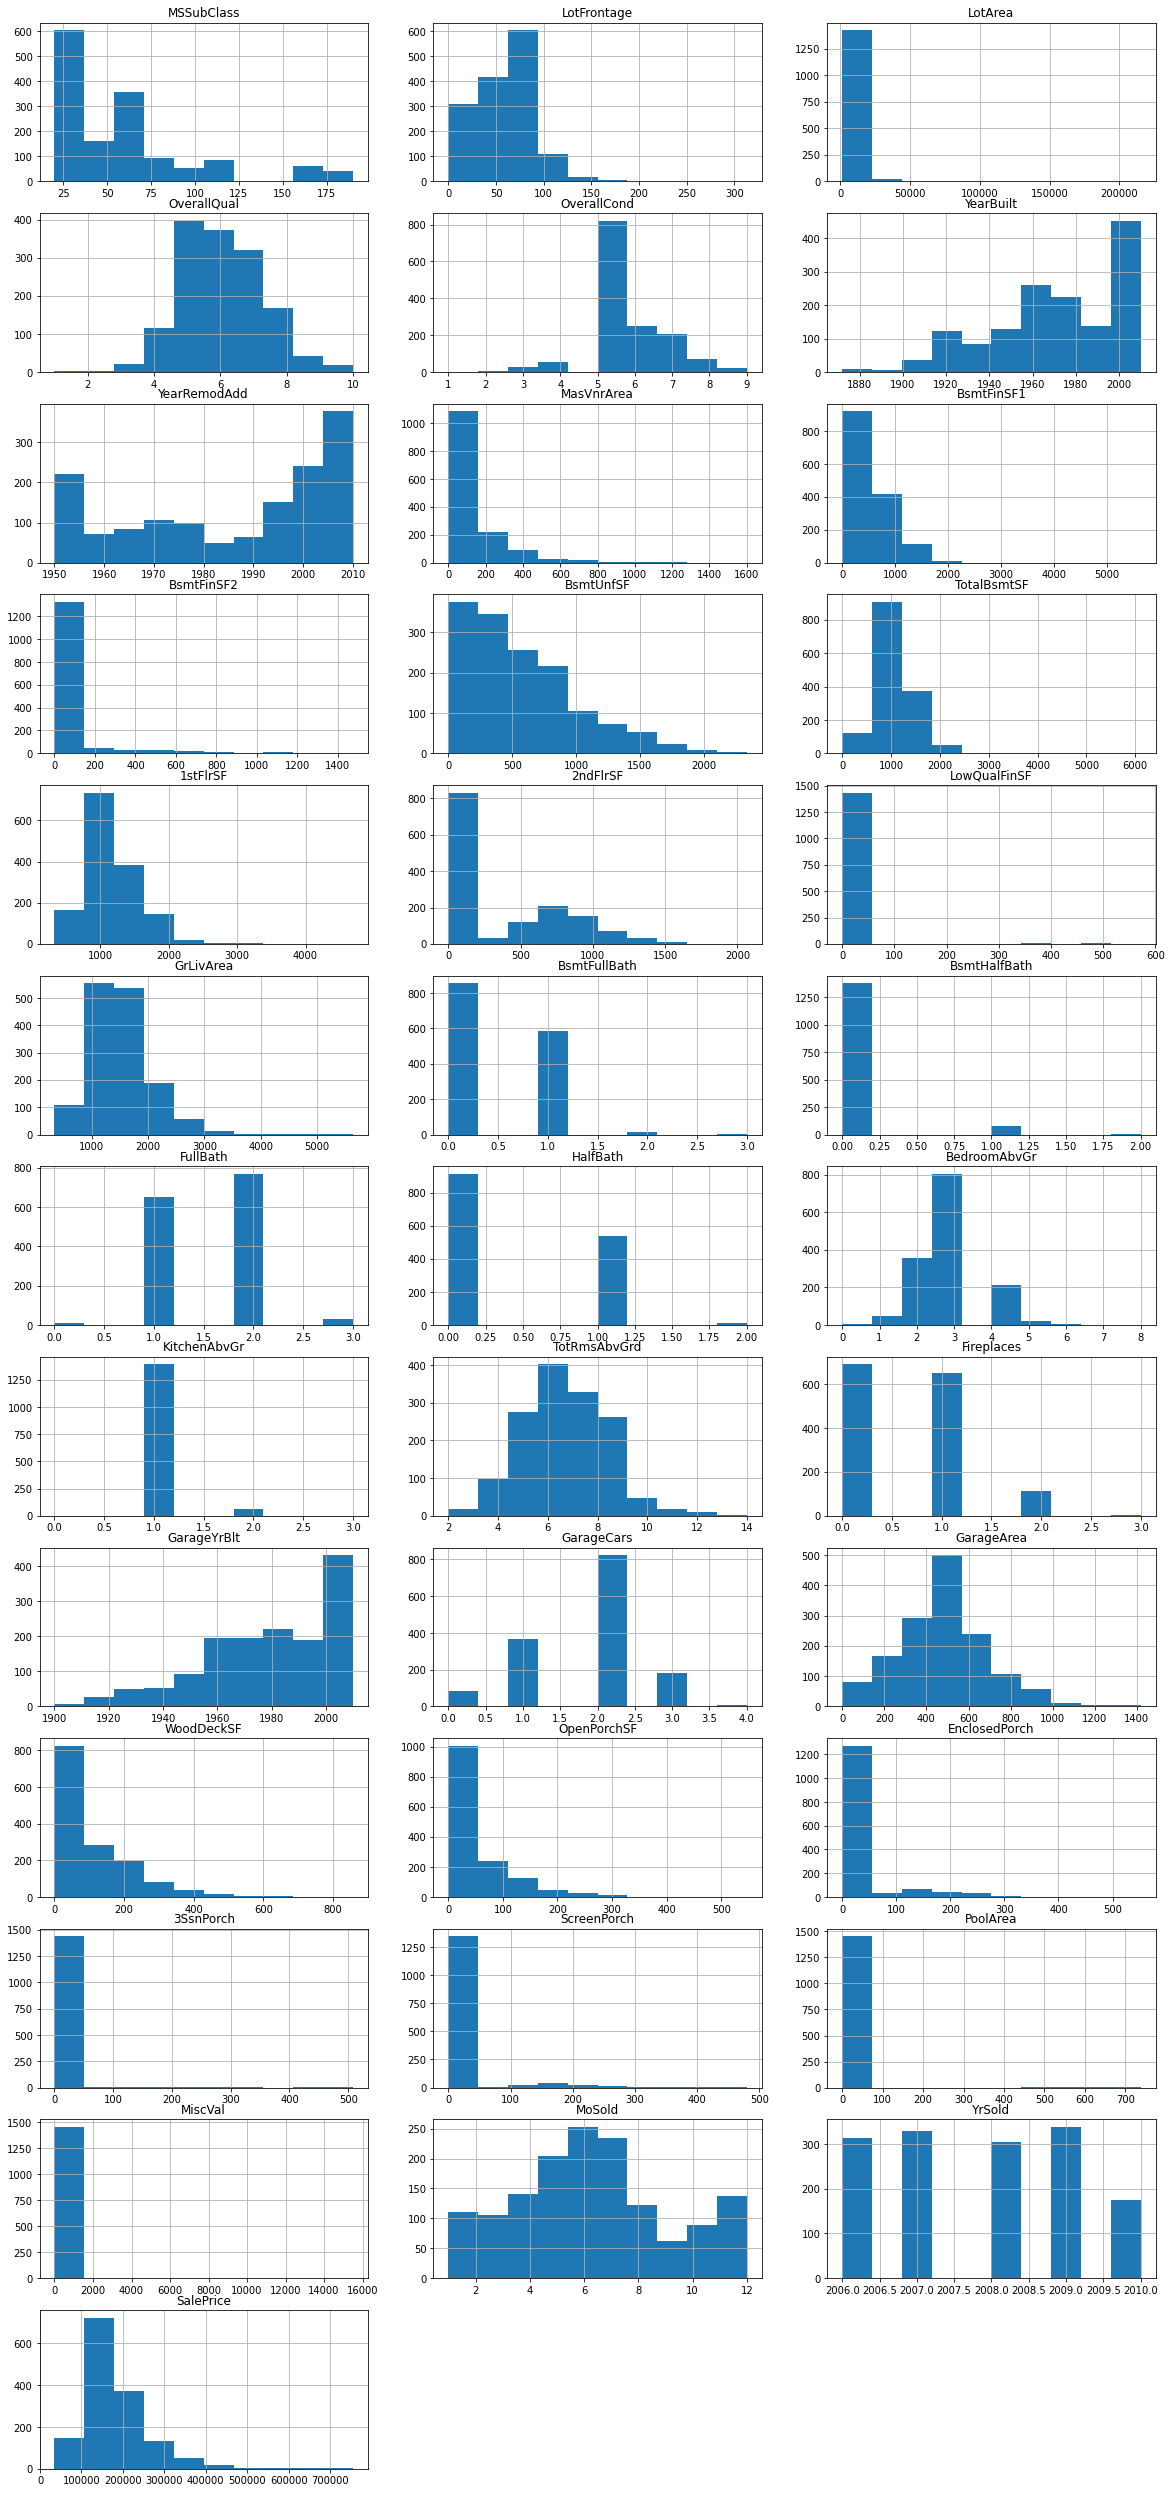

In [21]:
plt.figure(figsize=(20,45))
n=1
for i in train.columns:
    if (train[i].dtype == 'float64' or train[i].dtype == 'int64') and i!="Id" :
        plt.subplot(13,3,n)
        train[i].hist()
        plt.title(i)
        n=n+1

As presented in these plots, most of the columns are right-skewed. However, this is related to possible outliers that change the overall plotting. Also, some data categorized as numerical could be used as categorical, being the case of `YrSold`, `GarageCars`

In complement, the scatterplots between those values and SalePrice would be made to analyze possible correlations:

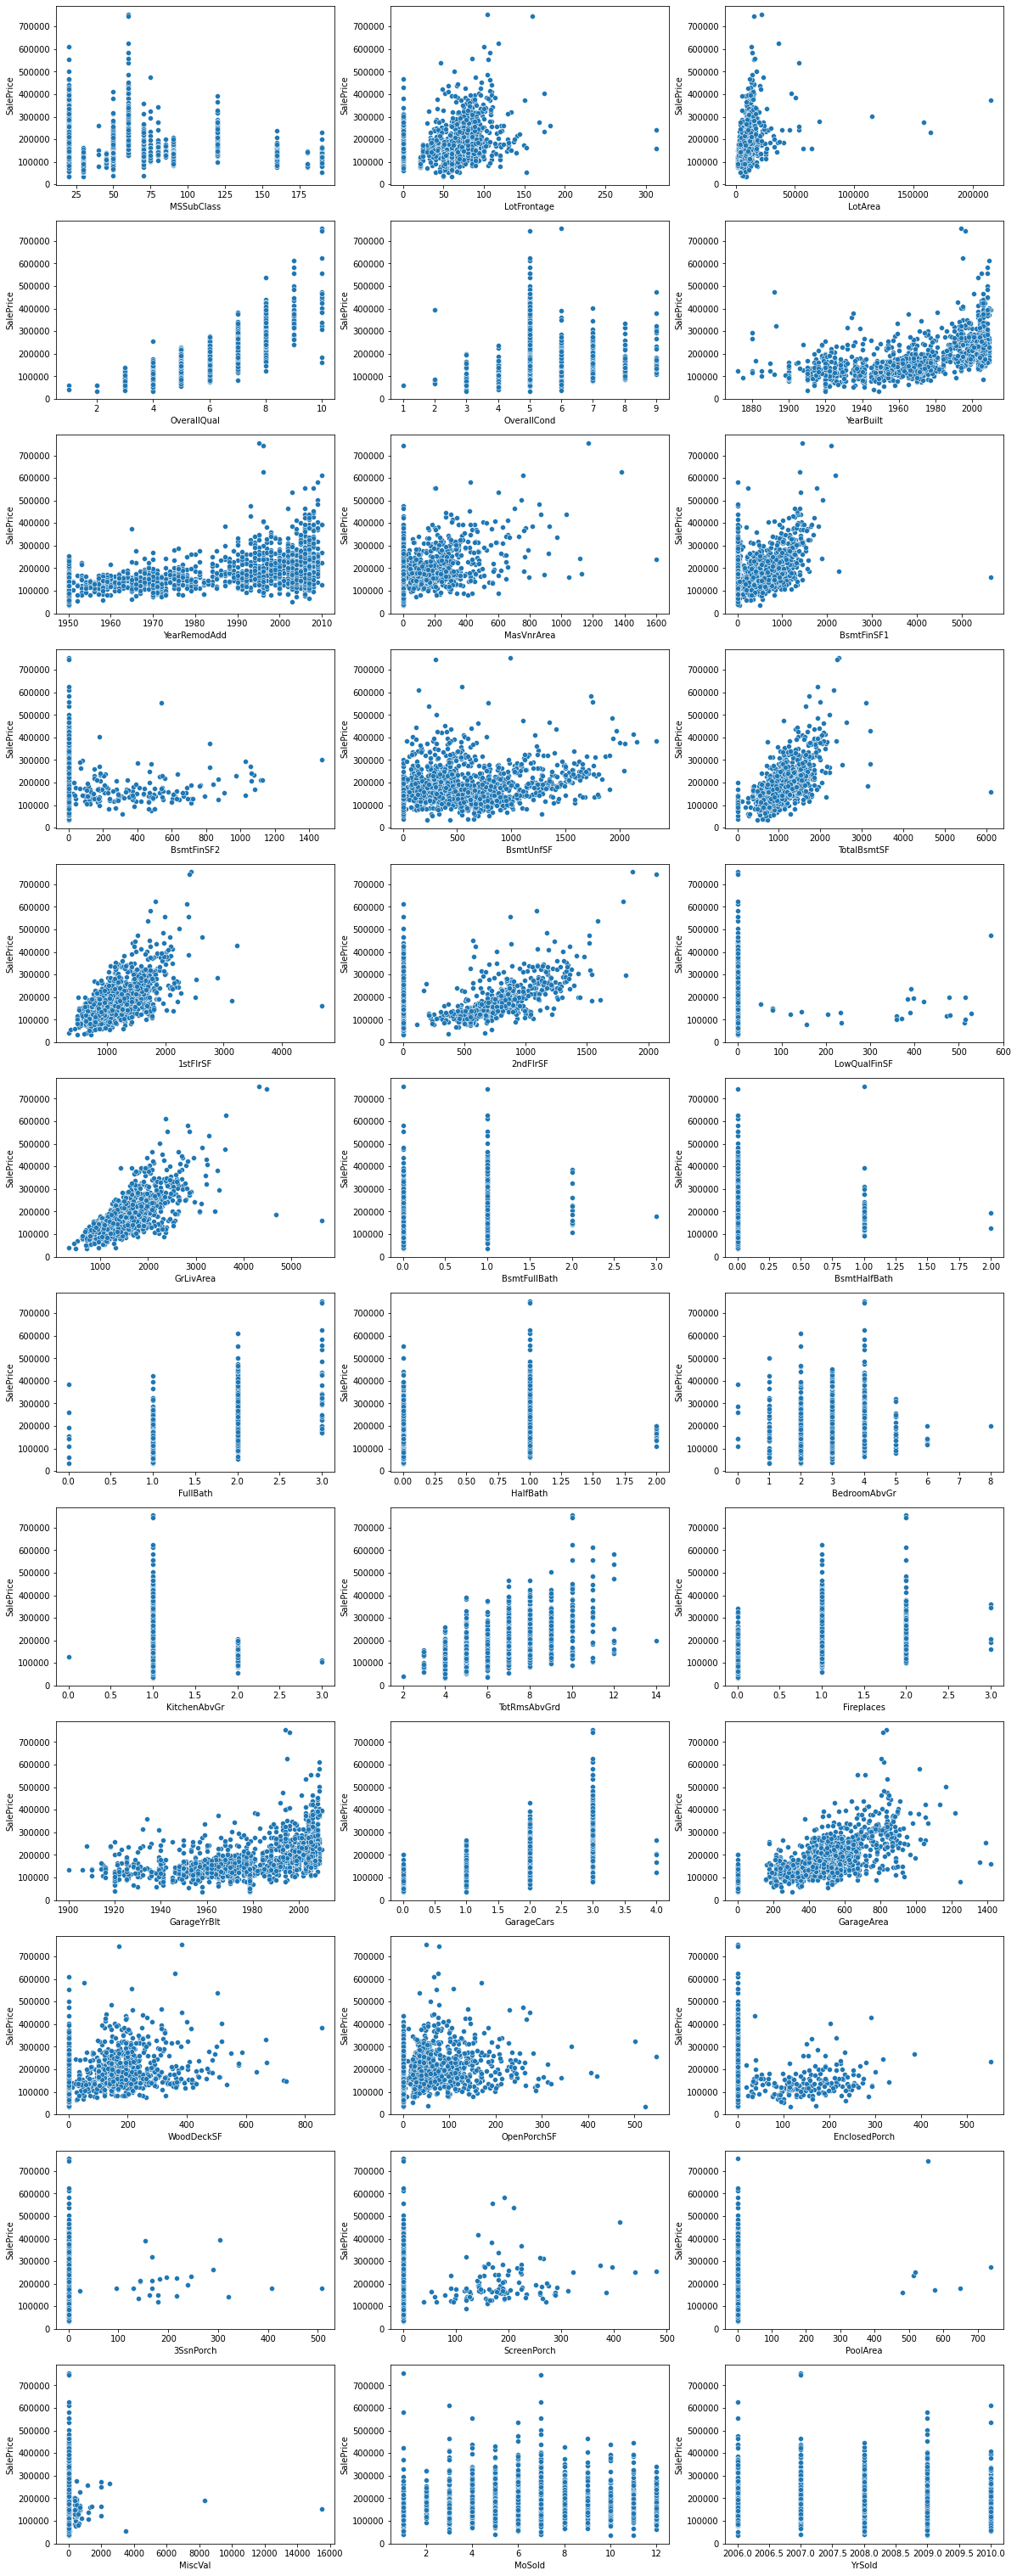

In [22]:
plt.figure(figsize=(20,55))
n=1
for i in train.columns:
    if (train[i].dtype == 'float64' or train[i].dtype == 'int64') and i!="Id" and i!="SalePrice" :
        plt.subplot(12,3,n)
        sns.scatterplot(data=train, x=i, y="SalePrice")
        n=n+1

In this case, columns such as `LotArea` and `OverallQual` seems to have a direct correlation with the price, but with others such as `MoSold`, there is no direct relation. With this in consideration, the boxplots of the categorical values related to `SalePrice` were plotted: 

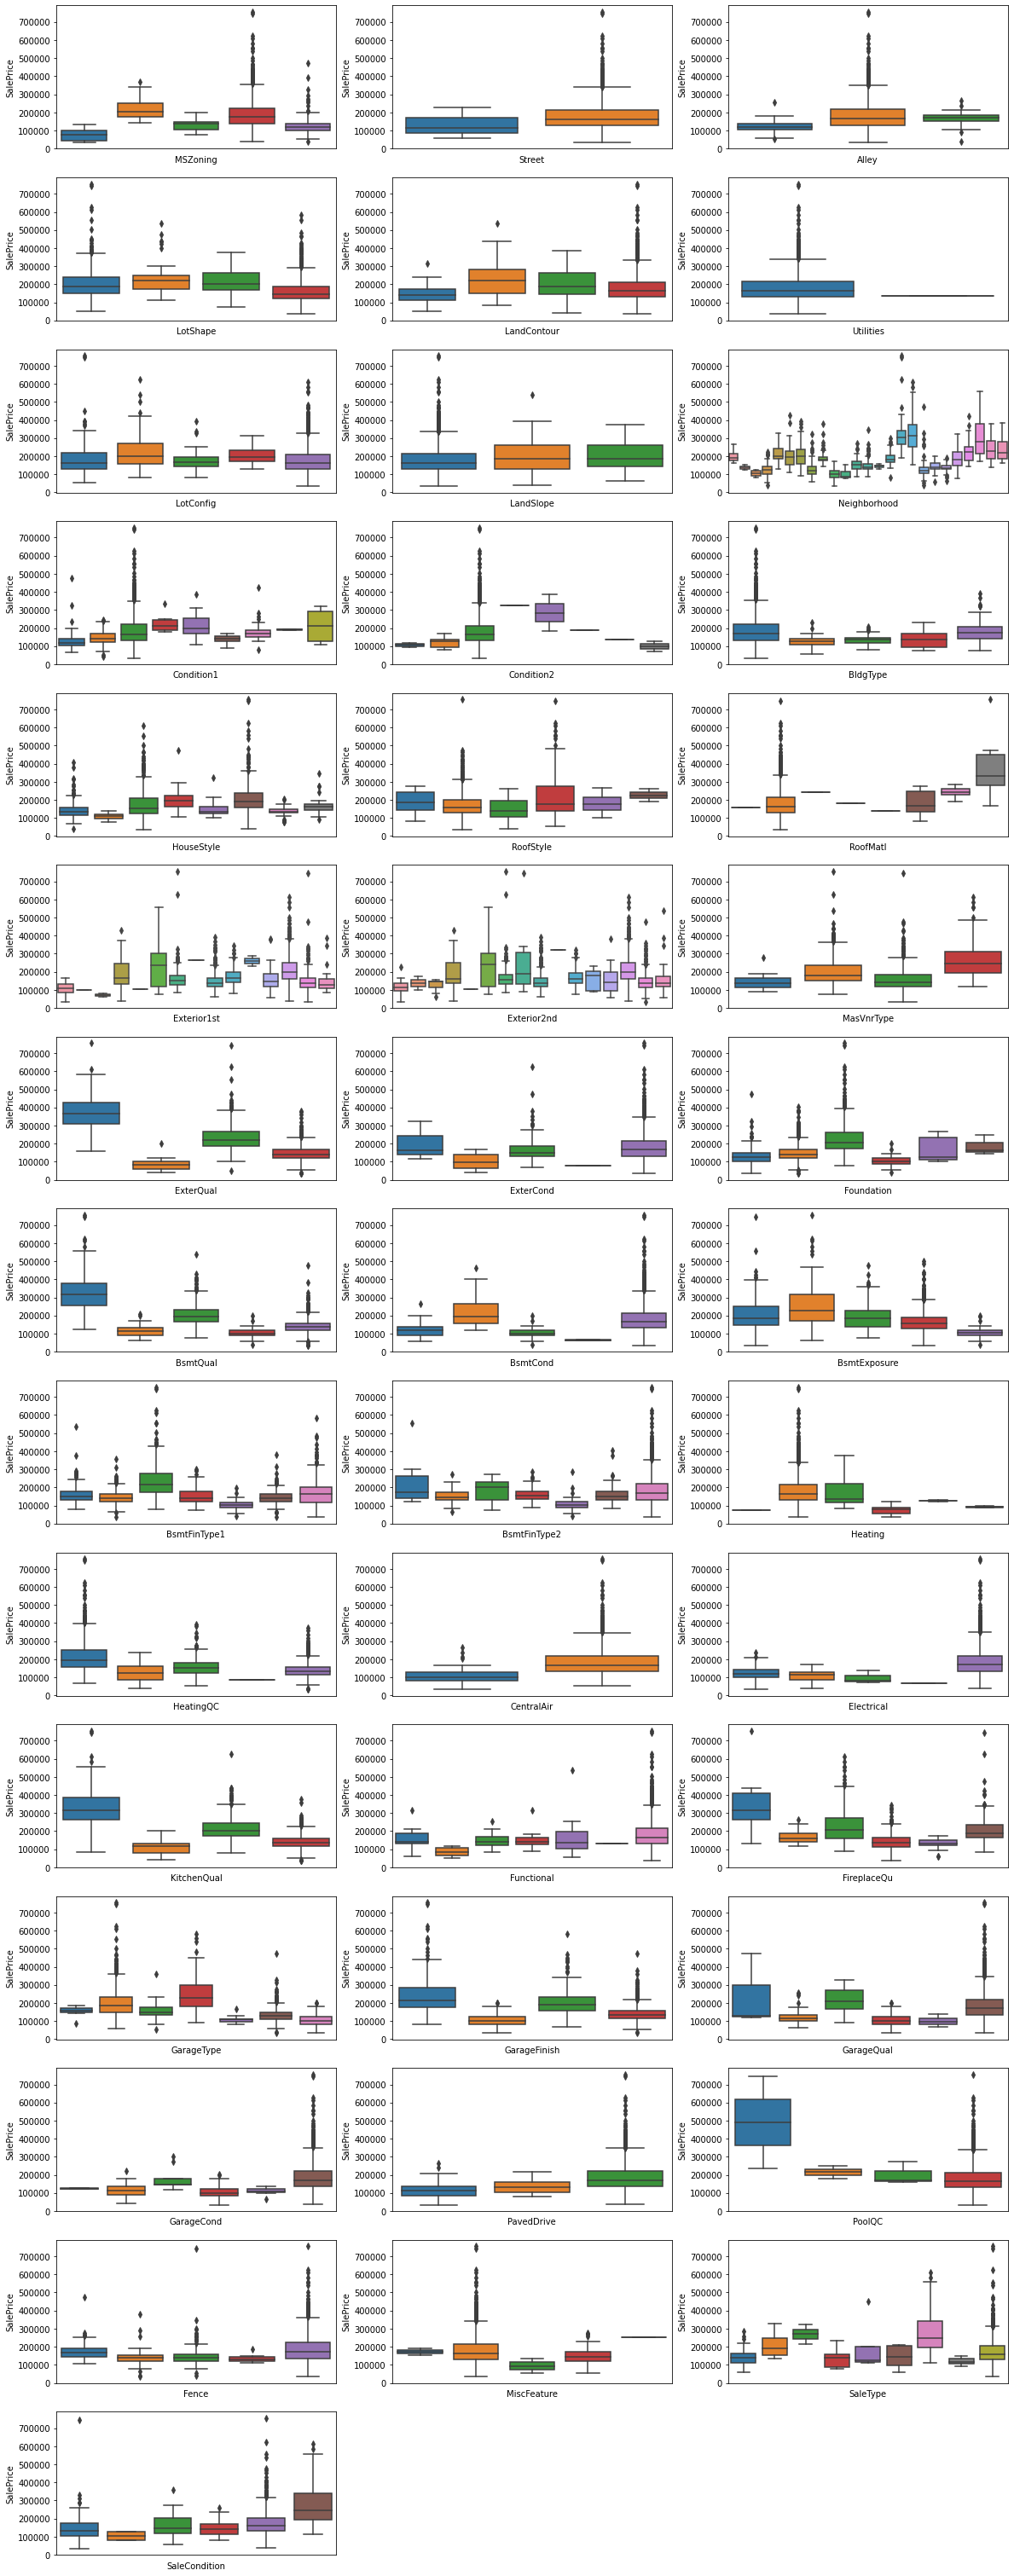

In [23]:
plt.figure(figsize=(20,55))
n=1
for i in train.columns:
    if (train[i].dtype != 'float64' and train[i].dtype != 'int64') and i!="Id" and i!="SalePrice" :
        plt.subplot(15,3,n)
        sns.boxplot(data=train, x=i, y="SalePrice")
        plt.xticks([])
        n=n+1

In the categories analysis, it was recognized that in columns such as `PoolQC` and `RoofMatl` there is one category that increases the `SalePrice` and it is a candidate for being a significant value for predicting the overall price.

Finally, a correlation matrix is shown:

<AxesSubplot:>

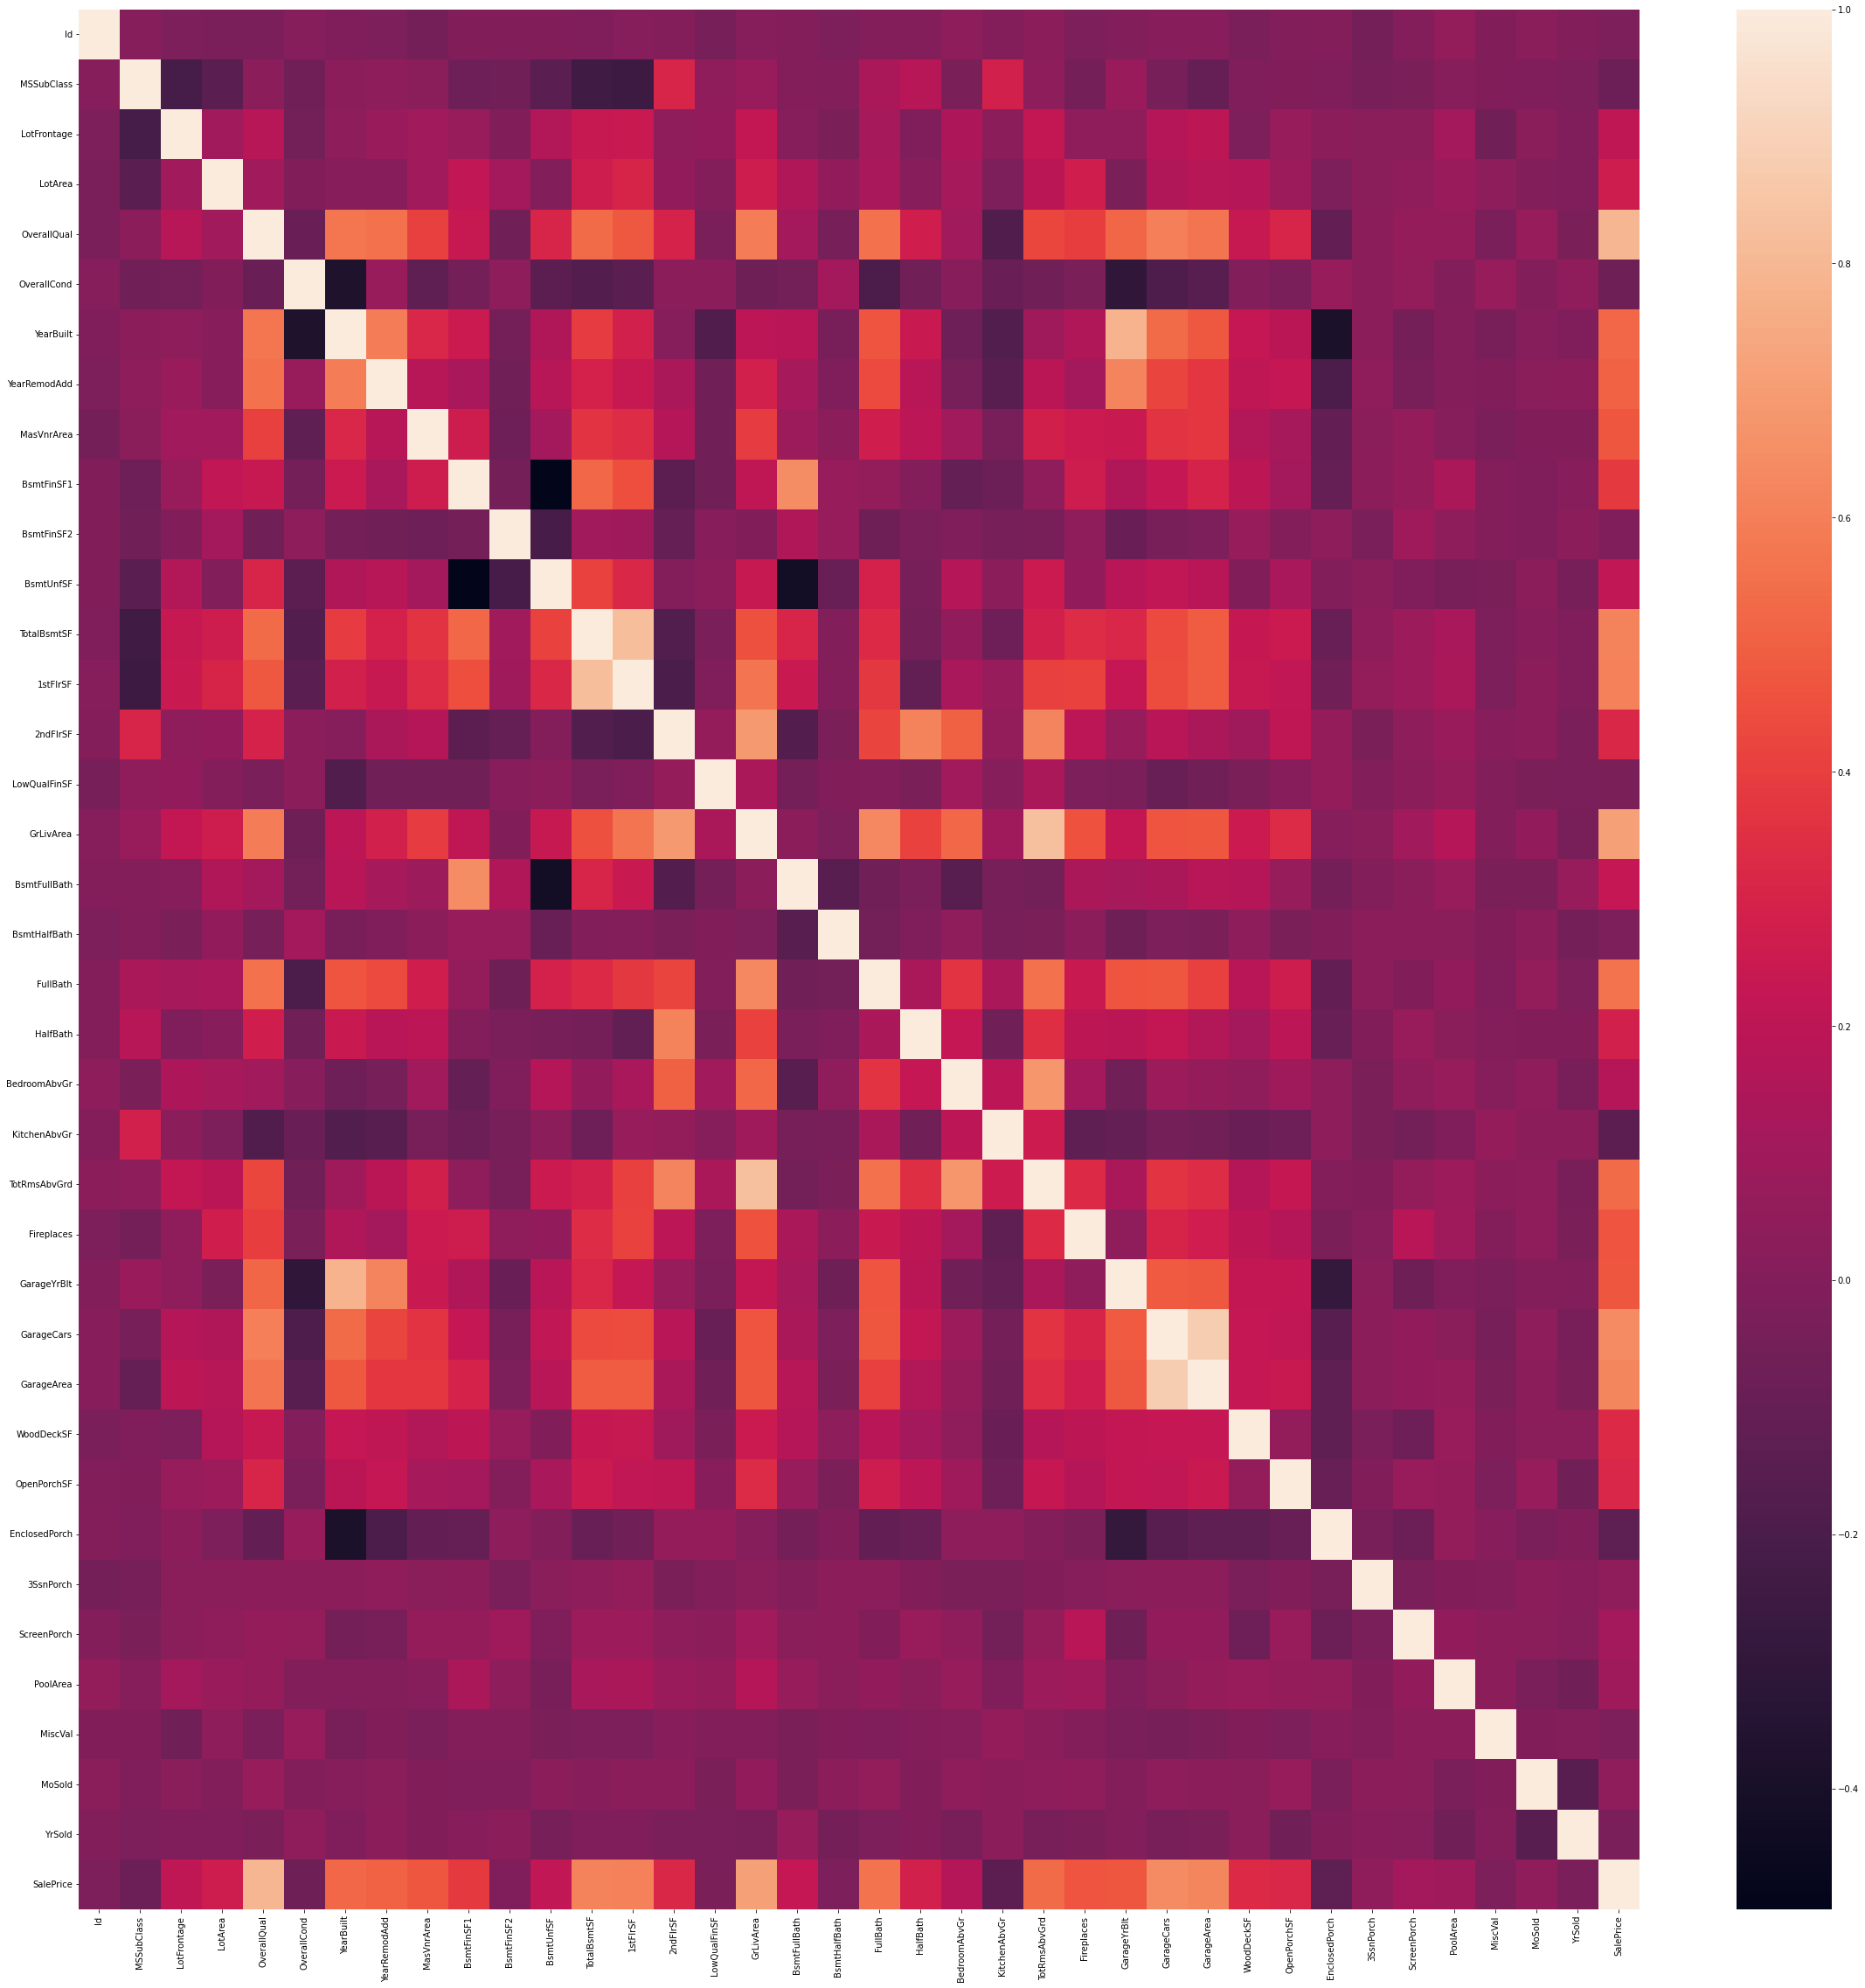

In [24]:
plt.figure(figsize=(40,40))
sns.heatmap(train.corr())

As it is expected,there are some variables that could be correlated by the darkest and lightest colors. For this reason, it will be shown the elements with a correlation higher than 0.6

In [25]:
vals=train.corr().index
vals2=list(vals)
combin=[]
for i in vals2[1:-1]:
    for j in vals2[1:-1]:
        if j != i and abs(train.corr()[i][j]) > 0.6 and train.corr()[i][j] not in combin:
            print("Correlation between " + i + " and " +j + ": "+  str(train.corr()[i][j]))
            combin.append(train.corr()[i][j]) #Avoid repeating combinations

Correlation between OverallQual and GarageCars: 0.6006707165907149
Correlation between YearBuilt and GarageYrBlt: 0.7805549935309495
Correlation between YearRemodAdd and GarageYrBlt: 0.618129842136655
Correlation between BsmtFinSF1 and BsmtFullBath: 0.6492117535742649
Correlation between TotalBsmtSF and 1stFlrSF: 0.8195299750050339
Correlation between 2ndFlrSF and GrLivArea: 0.6875010641666033
Correlation between 2ndFlrSF and HalfBath: 0.6097073002717436
Correlation between 2ndFlrSF and TotRmsAbvGrd: 0.6164226354915431
Correlation between GrLivArea and FullBath: 0.6300116462511148
Correlation between GrLivArea and TotRmsAbvGrd: 0.8254893743088425
Correlation between BedroomAbvGr and TotRmsAbvGrd: 0.676619935742649
Correlation between GarageCars and GarageArea: 0.882475414281462


Some variables are correlated, such as `YearBuilt` and `GarageYrBlt`. This must be considered in the prediction model to avoid colinearity